In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import nltk # for pre-processing text
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob # for sentiment analysis

import string
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns
sns.set_context('notebook')
pd.set_option('display.max_columns', 30)

In [76]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhara\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

The period considered as a sample study is from April 2001 to April 2016. This includes terms of Bimal Jalan, YV Reddy, Raghuram Rajan, Subbarao, Urjit Patel. 

In [2]:
df= pd.read_excel(r'D:\Bharani\MSE\Dissertation\News Sentiment analysis\RBI communication.xlsx',sheet_name='Mid -review 2 (2)',parse_dates=['Date'],index_col='governor')
df=df.sort_values('Date')
df.head()

,comments,Date,nth meeting,governors statement,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
governor,,,,,,,,,,,,
Dr. Bimal Jalan,NaN,1998-04-29,NaN,Monetary Policy to support growth in 1998-99.\...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dr. Bimal Jalan,NaN,1998-10-30,NaN,Introduction\n\n It will be recalled tha...,34. For improving the conduct of monetar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dr. Bimal Jalan,NaN,1999-04-20,NaN,Domestic Developments\n\n2. According to th...,III. Financial Sector Reforms and\nMonetary Po...,Reserve Bank of India has already established ...,NaN,NaN,NaN,NaN,NaN,NaN
Dr. Bimal Jalan,NaN,1999-10-29,Mid-Term,Domestic developments\n\n2. According to the l...,III. Financial Sector Reforms and\nMonetary Po...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dr. Bimal Jalan,NaN,2000-05-03,Annual,Domestic Developments\n\n2. According to the e...,37. Decisions in regard to interest rates on b...,(a) Review of PLR norms\n(i) Tenor-Linked PLR\...,Approach to Universal Banking\n\n89. The Naras...,NaN,NaN,NaN,NaN,1.0


In [3]:
df.dtypes

comments                       object
Date                   datetime64[ns]
nth meeting                    object
governors statement            object
Unnamed: 5                     object
Unnamed: 6                     object
Unnamed: 7                     object
Unnamed: 8                     object
Unnamed: 9                     object
Unnamed: 10                    object
Unnamed: 11                    object
Unnamed: 12                   float64
dtype: object

In [9]:
df.tail(100)

,comments,Date,nth meeting,governors statement,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,year
governor,,,,,,,,,,,,,
Dr. Bimal Jalan,NaN,2002-04-29,Annual,I. Review of Macroeconomic and Monetary\nDevel...,Indian mutual funds will be allowed to invest ...,74. It is customary for the overseas branches ...,"111. The Reserve Bank, based on its on-site in...",NaN,NaN,NaN,NaN,5.0,2002
Dr.Y.V.Reddy,NaN,2002-10-29,Mid-Term,Domestic Developments\n\n2. The annual Stateme...,37. The annual policy Statement of April 2002 ...,80. In order to preserve the integrity of the ...,127. The Reserve Bank is continuing its effort...,NaN,NaN,NaN,NaN,6.0,2002
Dr.Y.V.Reddy,NaN,2003-04-29,Annual,I. Review of Macroeconomic and Monetary\nDevel...,40. The Reserve Bank has received various sugg...,"87. At present, the quantum of direct housing ...",130. The Securitisation and Reconstruction of ...,NaN,NaN,NaN,NaN,7.0,2003
Dr.Y.V.Reddy,NaN,2003-11-03,Mid-Term,I. Mid-term Review of Macroeconomic and\nMonet...,"(g) Apart from subdued credit growth, which wi...","75. In recent years, a number of steps have be...",NaN,NaN,NaN,NaN,NaN,8.0,2003
Dr.Y.V.Reddy,NaN,2004-05-18,Annual,The policy documents of the Reserve Bank provi...,Since external capital flows cannot be easily ...,75. The Internal Group had proposed introducti...,"122. At present, banks are required to make pr...",Indian corporates permitted to avail ECBs up t...,NaN,NaN,NaN,9.0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Shatikanta Das,NaN,2020-05-22,1st,On the basis of an assessment of the current a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,2020
Shatikanta Das,NaN,2020-08-06,2nd,On the basis of an assessment of the current a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,2020
Shatikanta Das,NaN,2020-10-09,3rd,On the basis of an assessment of the current a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,2020


Bimonthly review started in financial year 2014.Until then, there were quarter reviews and mid reviews(although called differently, the frequency remained same- 6 meetings per year).

In [10]:
dates= df['Date']


In [11]:
day=[]
from datetime import datetime as date
for i in df['Date']:
    day=day

C:\Users\bhara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


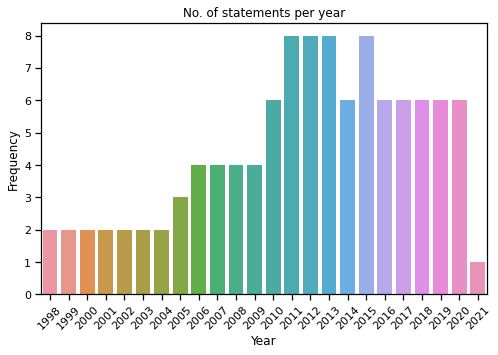

In [12]:
df['year']=df['Date'].dt.year
df_1=df[df['nth meeting'] != 'unannounced']
# print("no of statments per year")
# print(df['year'].value_counts(sort=False))

#no of statements per year
plt.figure(figsize=(8,5))
plt.title("No. of statements per year")

x=df.year.value_counts()
sns.barplot(x.index, x);
plt.xticks(rotation=45);
plt.xlabel("Year");
plt.ylabel("Frequency");

# print(df.index.value_counts(sort= False))

The frequency of the releases- Monetary policy or press releases has increases significantly in 10 years. DR. Subbarao has given had higher communication - press releases, governor's statements or both, along with an annual policy in April during his period. He alternated the governor's statements, covered the mid quarter review only through press releases.
There were a couple of unannounced statements which were excluded in this graph.Subbarao has given statements during quarter reviews, while mid reviews were in press releases. As seen in the graph, the number of statements have increased over time. Where during the time of Dr. Bimal Jala, there were only a couple of statements- one in April and another in October, This count has gradually increased to 6 statements per year.


Although only monetary policy statements were considered here, it should be noted that the number of statement has improved overall- including seperate statements for minutes of the meeting, state of development policies and governors statement. this number is at the peek in current period of Shaktikanta Das.

In [13]:
df.isnull().mean()
#df.drop(['comments','A/R/no change','rate change','Unconventional measure'],axis=1,inplace=True)

comments               0.851852
Date                   0.000000
nth meeting            0.027778
governors statement    0.000000
Unnamed: 5             0.203704
Unnamed: 6             0.240741
Unnamed: 7             0.814815
Unnamed: 8             0.953704
Unnamed: 9             0.972222
Unnamed: 10            0.990741
Unnamed: 11            0.990741
Unnamed: 12            0.037037
year                   0.000000
dtype: float64

In [14]:
df.shape

(108, 13)

In [15]:
df.fillna('....',inplace=True)
print(df.isnull().mean())
df

comments               0.0
Date                   0.0
nth meeting            0.0
governors statement    0.0
Unnamed: 5             0.0
Unnamed: 6             0.0
Unnamed: 7             0.0
Unnamed: 8             0.0
Unnamed: 9             0.0
Unnamed: 10            0.0
Unnamed: 11            0.0
Unnamed: 12            0.0
year                   0.0
dtype: float64


,comments,Date,nth meeting,governors statement,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,year
governor,,,,,,,,,,,,,
Dr. Bimal Jalan,....,1998-04-29,....,Monetary Policy to support growth in 1998-99.\...,....,....,....,....,....,....,....,....,1998
Dr. Bimal Jalan,....,1998-10-30,....,Introduction\n\n It will be recalled tha...,34. For improving the conduct of monetar...,....,....,....,....,....,....,....,1998
Dr. Bimal Jalan,....,1999-04-20,....,Domestic Developments\n\n2. According to th...,III. Financial Sector Reforms and\nMonetary Po...,Reserve Bank of India has already established ...,....,....,....,....,....,....,1999
Dr. Bimal Jalan,....,1999-10-29,Mid-Term,Domestic developments\n\n2. According to the l...,III. Financial Sector Reforms and\nMonetary Po...,....,....,....,....,....,....,....,1999
Dr. Bimal Jalan,....,2000-05-03,Annual,Domestic Developments\n\n2. According to the e...,37. Decisions in regard to interest rates on b...,(a) Review of PLR norms\n(i) Tenor-Linked PLR\...,Approach to Universal Banking\n\n89. The Naras...,....,....,....,....,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Shatikanta Das,....,2020-05-22,1st,On the basis of an assessment of the current a...,....,....,....,....,....,....,....,100,2020
Shatikanta Das,....,2020-08-06,2nd,On the basis of an assessment of the current a...,....,....,....,....,....,....,....,101,2020
Shatikanta Das,....,2020-10-09,3rd,On the basis of an assessment of the current a...,....,....,....,....,....,....,....,102,2020


In [16]:
#the seperate columns were added to make the statement
df['Statement']=''
df['Statement']= df['governors statement']+df['Unnamed: 5']+df['Unnamed: 6']+ df['Unnamed: 7']+df['Unnamed: 8']+ df['Unnamed: 9']+df['Unnamed: 10']+ df['Unnamed: 11']
len(df['Statement'][1])

45766

In [17]:
sp=df[['comments','Date','nth meeting','year','Statement']]
sp['Month']=sp['Date'].dt.month_name()
len(sp['Statement'][1])
sp

<ipython-input-17-ba1a8f510310>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp['Month']=sp['Date'].dt.month_name()


,comments,Date,nth meeting,year,Statement,Month
governor,,,,,,
Dr. Bimal Jalan,....,1998-04-29,....,1998,Monetary Policy to support growth in 1998-99.\...,April
Dr. Bimal Jalan,....,1998-10-30,....,1998,Introduction\n\n It will be recalled tha...,October
Dr. Bimal Jalan,....,1999-04-20,....,1999,Domestic Developments\n\n2. According to th...,April
Dr. Bimal Jalan,....,1999-10-29,Mid-Term,1999,Domestic developments\n\n2. According to the l...,October
Dr. Bimal Jalan,....,2000-05-03,Annual,2000,Domestic Developments\n\n2. According to the e...,May
...,...,...,...,...,...,...
Shatikanta Das,....,2020-05-22,1st,2020,On the basis of an assessment of the current a...,May
Shatikanta Das,....,2020-08-06,2nd,2020,On the basis of an assessment of the current a...,August
Shatikanta Das,....,2020-10-09,3rd,2020,On the basis of an assessment of the current a...,October


In [18]:
#Number of statements released by each governor
sp.index.value_counts()

Subbarao           32
Raghuram Rajan     21
Dr.Y.V.Reddy       19
Urjit Patel        14
Shatikanta Das     13
Dr. Bimal Jalan     9
Name: governor, dtype: int64

In [22]:
#tokenizing the statements into words and sentences
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
tokens= sp.apply(lambda row: nltk.word_tokenize(row['Statement']), axis=1)
sent_tokens= sp.apply(lambda row: nltk.sent_tokenize(row['Statement']), axis=1)
sp['tokens']= tokens
sp['sent_tokens']= sent_tokens
sp.sort_values('Date',inplace=True)
sp.head()

<ipython-input-22-e44f03c9f619>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp['tokens']= tokens
<ipython-input-22-e44f03c9f619>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp['sent_tokens']= sent_tokens
<ipython-input-22-e44f03c9f619>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp.sort_values('Date',inplace=

,comments,Date,nth meeting,year,Statement,Month,tokens,sent_tokens
governor,,,,,,,,
Dr. Bimal Jalan,....,1998-04-29,....,1998,Monetary Policy to support growth in 1998-99.\...,April,"[Monetary, Policy, to, support, growth, in, 19...",[Monetary Policy to support growth in 1998-99....
Dr. Bimal Jalan,....,1998-10-30,....,1998,Introduction\n\n It will be recalled tha...,October,"[Introduction, It, will, be, recalled, that, i...",[Introduction\n\n It will be recalled th...
Dr. Bimal Jalan,....,1999-04-20,....,1999,Domestic Developments\n\n2. According to th...,April,"[Domestic, Developments, 2, ., According, to, ...","[Domestic Developments\n\n2., According to the..."
Dr. Bimal Jalan,....,1999-10-29,Mid-Term,1999,Domestic developments\n\n2. According to the l...,October,"[Domestic, developments, 2, ., According, to, ...","[Domestic developments\n\n2., According to the..."
Dr. Bimal Jalan,....,2000-05-03,Annual,2000,Domestic Developments\n\n2. According to the e...,May,"[Domestic, Developments, 2, ., According, to, ...","[Domestic Developments\n\n2., According to the..."


In [23]:
#finding the length of the statements in terms of words and sentences
sp['N_words']=[len(row) for row in sp['tokens']]
sp['N_sent']= [len(row) for row in sp['sent_tokens']]
sp.head(40)

<ipython-input-23-951fb0a8d43f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp['N_words']=[len(row) for row in sp['tokens']]
<ipython-input-23-951fb0a8d43f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp['N_sent']= [len(row) for row in sp['sent_tokens']]


,comments,Date,nth meeting,year,Statement,Month,tokens,sent_tokens,N_words,N_sent
governor,,,,,,,,,,
Dr. Bimal Jalan,....,1998-04-29,....,1998,Monetary Policy to support growth in 1998-99.\...,April,"[Monetary, Policy, to, support, growth, in, 19...",[Monetary Policy to support growth in 1998-99....,3464,109
Dr. Bimal Jalan,....,1998-10-30,....,1998,Introduction\n\n It will be recalled tha...,October,"[Introduction, It, will, be, recalled, that, i...",[Introduction\n\n It will be recalled th...,7989,289
Dr. Bimal Jalan,....,1999-04-20,....,1999,Domestic Developments\n\n2. According to th...,April,"[Domestic, Developments, 2, ., According, to, ...","[Domestic Developments\n\n2., According to the...",11434,447
Dr. Bimal Jalan,....,1999-10-29,Mid-Term,1999,Domestic developments\n\n2. According to the l...,October,"[Domestic, developments, 2, ., According, to, ...","[Domestic developments\n\n2., According to the...",10804,395
Dr. Bimal Jalan,....,2000-05-03,Annual,2000,Domestic Developments\n\n2. According to the e...,May,"[Domestic, Developments, 2, ., According, to, ...","[Domestic Developments\n\n2., According to the...",16336,623
Dr. Bimal Jalan,....,2000-11-04,Mid-Term,2000,Domestic Developments\n\n2. On the basis of th...,November,"[Domestic, Developments, 2, ., On, the, basis,...","[Domestic Developments\n\n2., On the basis of ...",16259,564
Dr. Bimal Jalan,....,2001-04-19,Annual,2001,Domestic Developments\n\n4. According to the l...,April,"[Domestic, Developments, 4, ., According, to, ...","[Domestic Developments\n\n4., According to the...",22131,790
Dr. Bimal Jalan,Monetary and Credit Policy for the year 2001-2002,2001-10-22,Mid-Term,2001,Domestic Developments\n\n2. The annual Stateme...,October,"[Domestic, Developments, 2, ., The, annual, St...","[Domestic Developments\n\n2., The annual State...",15548,554
Dr. Bimal Jalan,....,2002-04-29,Annual,2002,I. Review of Macroeconomic and Monetary\nDevel...,April,"[I, ., Review, of, Macroeconomic, and, Monetar...","[I., Review of Macroeconomic and Monetary\nDev...",21878,841


In [24]:
sp.iloc[24]

comments                                                    ....
Date                                         2007-10-30 00:00:00
nth meeting                                                  2nd
year                                                        2007
Statement      Mid - Term Review of the Annual Policy 2007-08...
Month                                                    October
tokens         [Mid, -, Term, Review, of, the, Annual, Policy...
sent_tokens    [Mid - Term Review of the Annual Policy 2007-0...
N_words                                                    21478
N_sent                                                       748
Name: Dr.Y.V.Reddy, dtype: object

In [25]:
quarter=[]
Q1=['April','May','June']
Q2=['July','August','September']
Q3=['October','November','December']
Q4=['January','February','March']
for i in range(len(sp)):
    if sp.Month[i] in Q1:
        quarter.append('Q1')
    elif sp.Month[i] in Q2:
        quarter.append('Q2')
    elif sp.Month[i] in Q3:
        quarter.append('Q3')
    else:
        quarter.append('Q4')
        
# quarter

In [26]:
Q3=['October','November','December']
sp.Month[1] in Q3

True

# Analysis of the Words Used

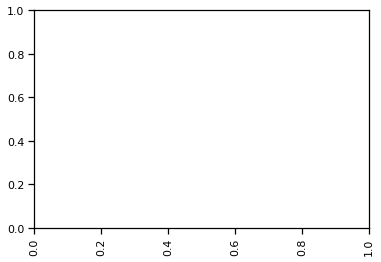

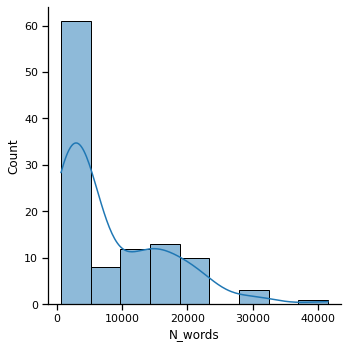

In [27]:
import seaborn as sns
#plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
x=sp['Date']
y3=sp['N_words']
sns.displot(y3, kde=True)
plt.show()

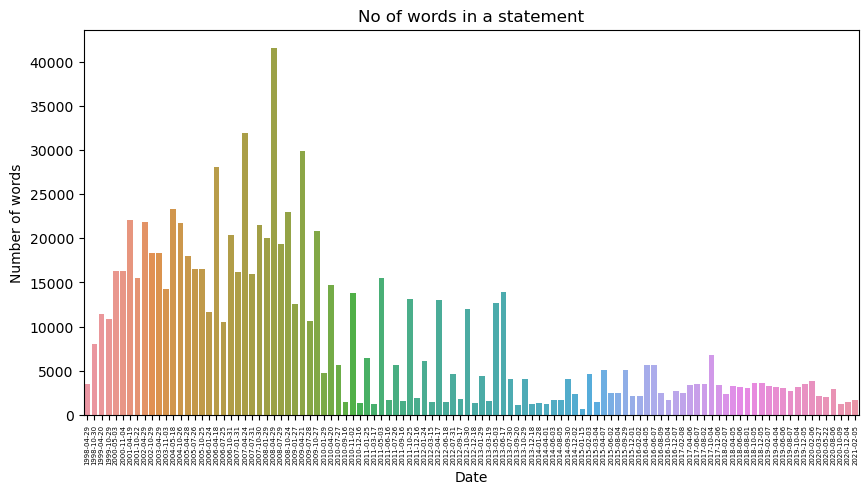

In [28]:
#number of words in each statement over time
plt.style.use('default')
import seaborn as sns
plt.figure(figsize=(10,5))
plt.title("No of words in a statement")
plt.xticks(rotation=90,fontsize=5)
x=sp['Date'].dt.date
y2=sp['N_sent']
y3=sp['N_words']
sns.barplot(x=x, y=y3)
plt.ylabel('Number of words')
#plt.axvline(x='2016', color='black', linestyle='--')
plt.show()

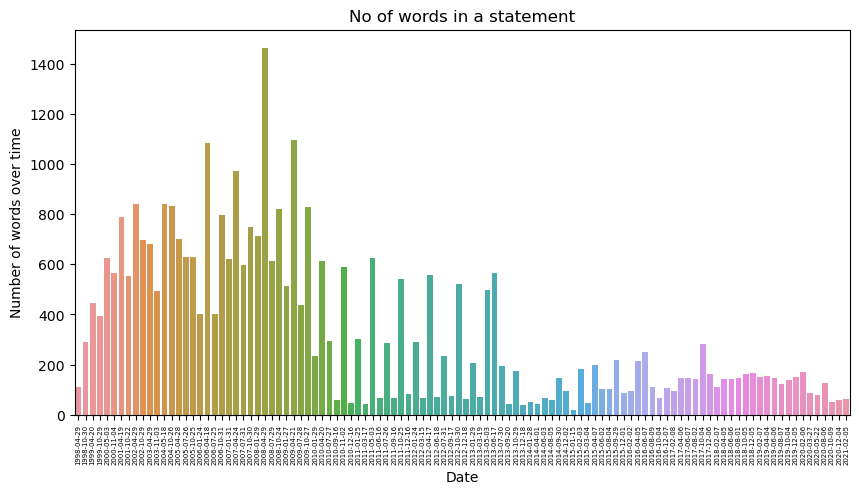

In [29]:
#number of words in each statement over time
plt.style.use('default')
import seaborn as sns
plt.figure(figsize=(10,5))
plt.title("No of words in a statement")
plt.xticks(rotation=90,fontsize=5)
x=sp['Date'].dt.date
y2=sp['N_sent']
sns.barplot(x=x, y=y2)
plt.ylabel('Number of words over time')
#plt.axvline(x='2016', color='black', linestyle='--')
plt.show()

It can be clearly seen that the number of words in a statement has drastcially decreased over times. The highest number of words were used at the annual policy meeting during the subprime crisis by YV Reddy. 
YV Reddy had the longest monetary policies(2003-2008). The length of the policies has gradually reduced over time.

In [30]:
#no.of words per sentence


<AxesSubplot:title={'center':'word count during different governor regimes'}, xlabel='Date', ylabel='Word Count'>

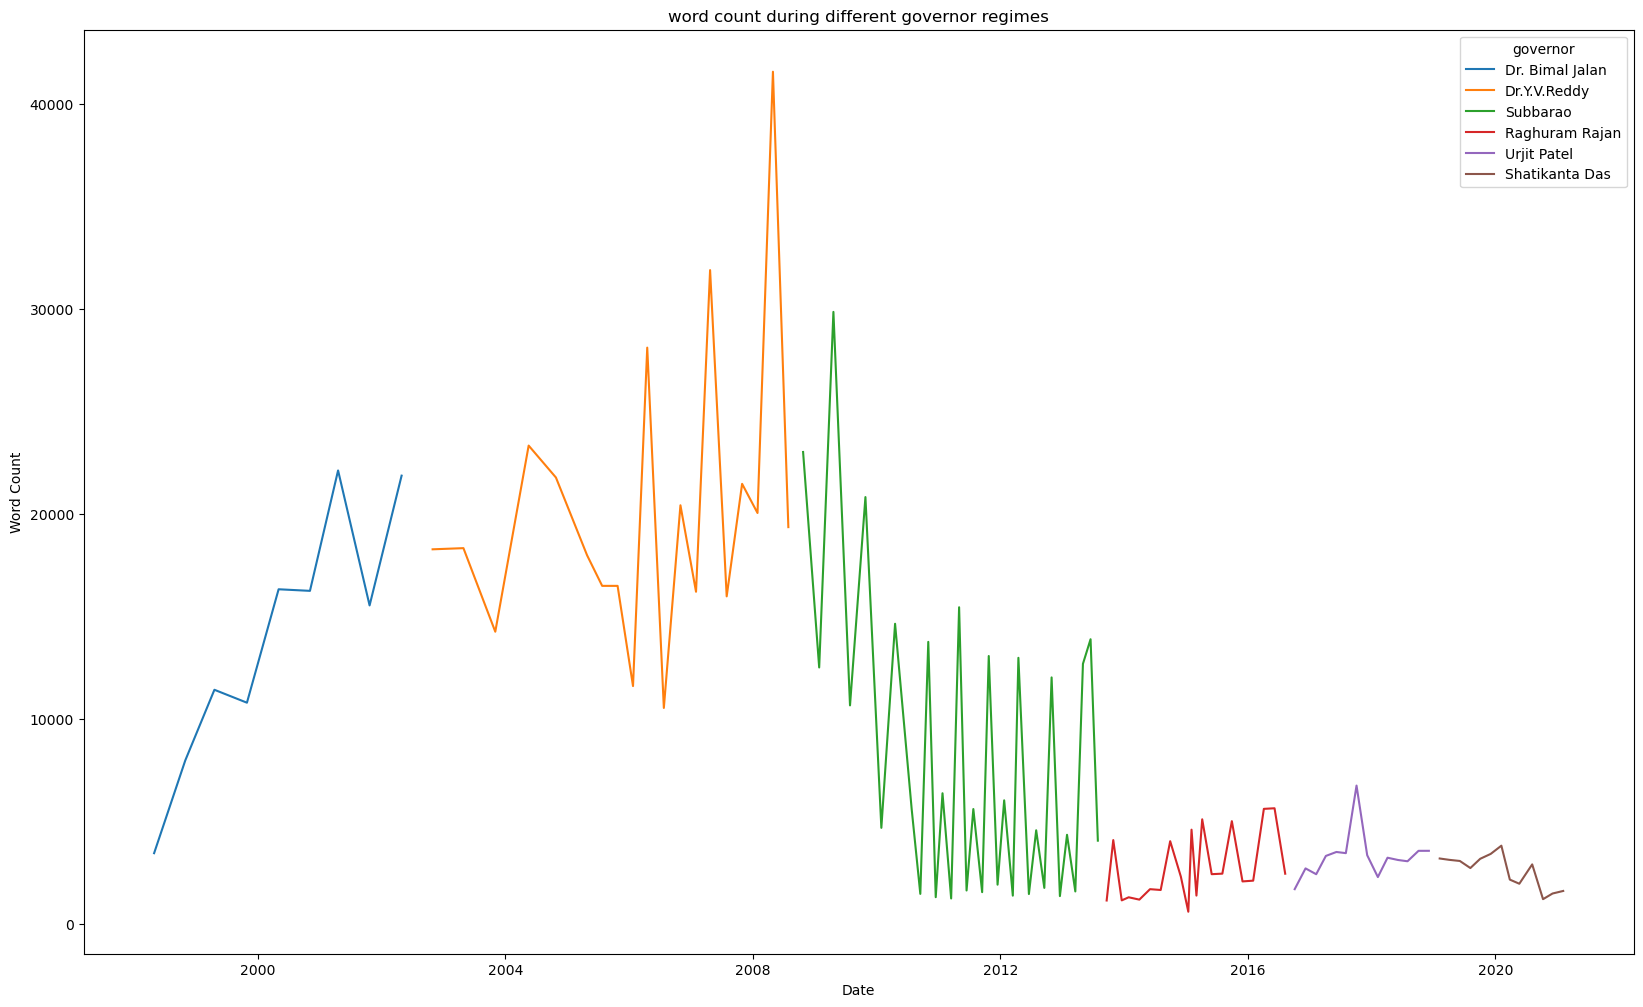

In [31]:
#plt.style.use('dark_background')
plt.figure(figsize=(20,12))
plt.title("word count during different governor regimes")
plt.ylabel("Word Count")
sns.lineplot(x=x, y=y3,
              hue=sp.index,
             data=sp)



In [32]:
x=sp['Date'].dt.date
y3=sp['N_words']
plt.figure(figsize=(8,6))
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x=sp.index, y='Farr.Jenkins.Paterson',data=sp,palette='viridis')
sns.despine(offset=10, trim=True)
plt.xlabel('Governor')
plt.ylabel('Readability Scores')



ValueError: Could not interpret input 'Farr.Jenkins.Paterson'

<Figure size 800x600 with 0 Axes>

In [33]:
sp.columns

Index(['comments', 'Date', 'nth meeting', 'year', 'Statement', 'Month',
       'tokens', 'sent_tokens', 'N_words', 'N_sent'],
      dtype='object')

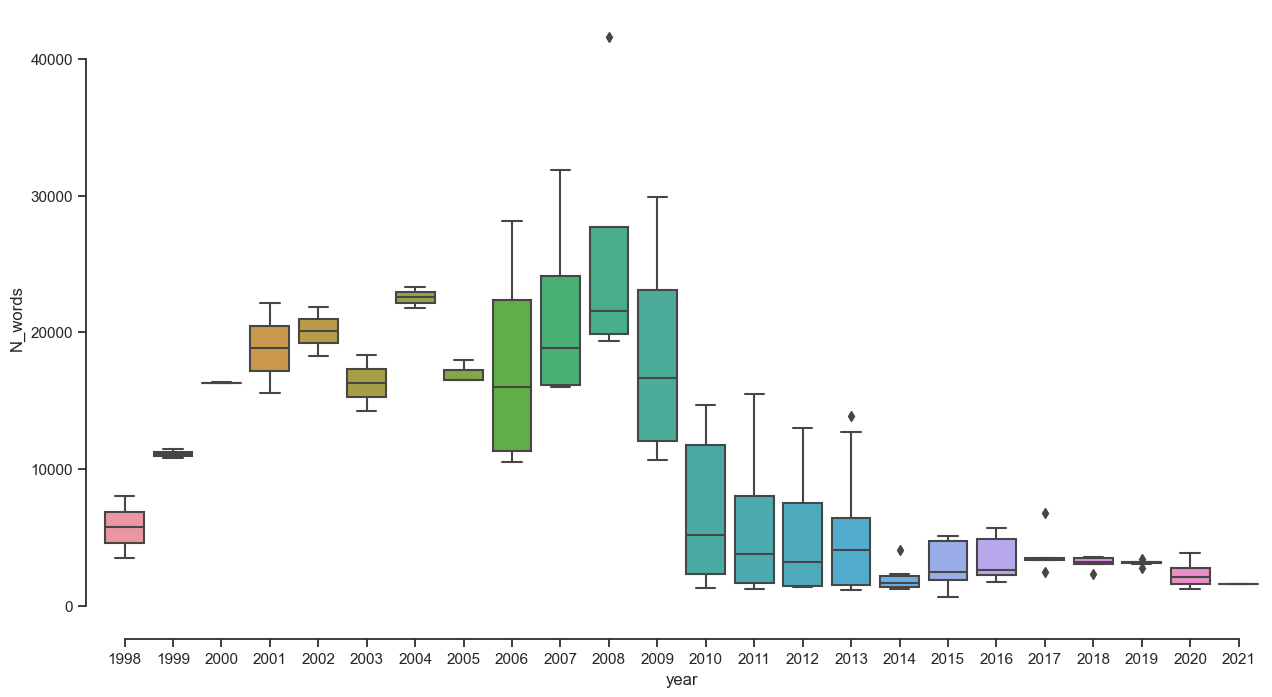

In [34]:
x=sp['Date'].dt.date
y3=sp['N_words']
plt.figure(figsize=(15,8))
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
plt.xticks(rotation=90)
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='year', y='N_words',data=sp)
sns.despine(offset=10, trim=True)

Mid term policy announcements by Dr.Subbarao were through press releases, which were significantly shaorter that  quarterly reviews. Hence,Excluding these becomes important, to elimate the outliers. This structure changed after Raghuram Rajan
Note: Mid review and Mid term review are different, by different governors. 

<AxesSubplot:xlabel='Year', ylabel='Number of words'>

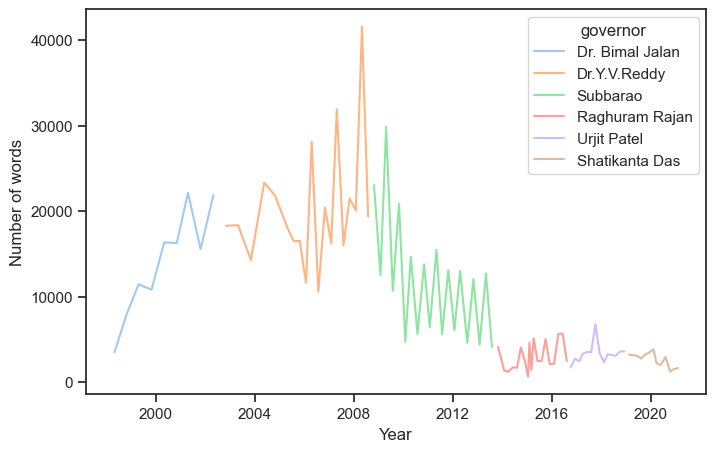

In [35]:
#excluding the mid term press releases
plt.figure(figsize=(8,5))
sp_1=sp[(sp['nth meeting'] != 'mid')]
plt.ylabel('Number of words')
plt.xlabel('Year')
sns.lineplot(x=sp_1['Date'].dt.date, y='N_words',
              hue=sp_1.index,
             data=sp_1)

In [36]:
print(sp_1['N_words'].groupby(sp_1.index).mean())
print(sp_1.index.value_counts())
sp_1.shape

governor
Dr. Bimal Jalan    13982.555556
Dr.Y.V.Reddy       20227.736842
Raghuram Rajan      2946.421053
Shatikanta Das      2617.230769
Subbarao           11649.850000
Urjit Patel         3301.214286
Name: N_words, dtype: float64
Subbarao           20
Dr.Y.V.Reddy       19
Raghuram Rajan     19
Urjit Patel        14
Shatikanta Das     13
Dr. Bimal Jalan     9
Name: governor, dtype: int64


(94, 10)

In [37]:
sp_1.iloc[(sp_1['N_words'].argmax())]

comments            Annual Policy Statement for the Year 2008-09
Date                                         2008-04-29 00:00:00
nth meeting                                               Annual
year                                                        2008
Statement      Annual Policy Statement for the Year 2008-09\n...
Month                                                      April
tokens         [Annual, Policy, Statement, for, the, Year, 20...
sent_tokens    [Annual Policy Statement for the Year 2008-09\...
N_words                                                    41579
N_sent                                                      1462
Name: Dr.Y.V.Reddy, dtype: object

C:\Users\bhara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


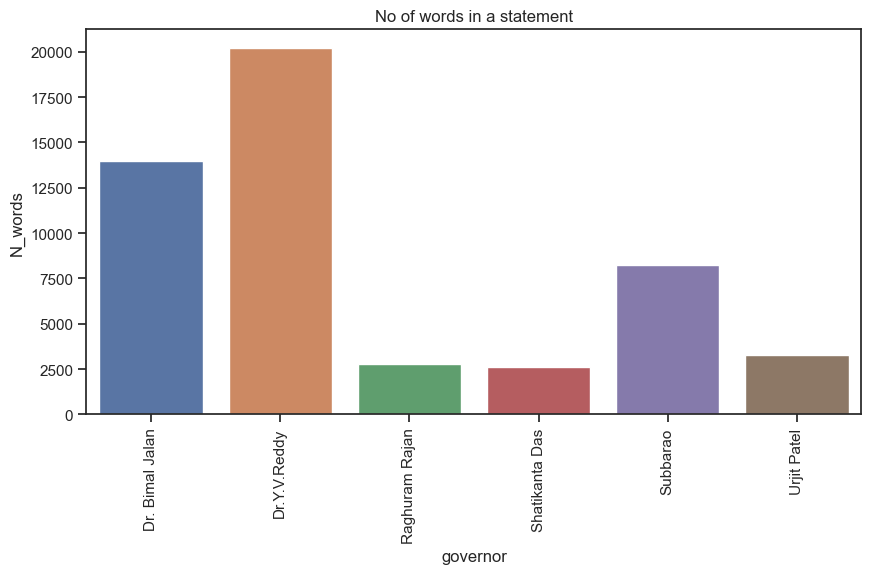

In [38]:
#average number of words by each governor
import seaborn as sns
plt.figure(figsize=(10,5))
plt.title("No of words in a statement")
plt.xlabel('Number of Words')
plt.xticks(rotation=90)

y=y3.groupby(sp.index).mean()

sns.barplot(y.index,y, palette="deep")
plt.show()

C:\Users\bhara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'No . of words in each statement'}, xlabel='Month', ylabel='N_words'>

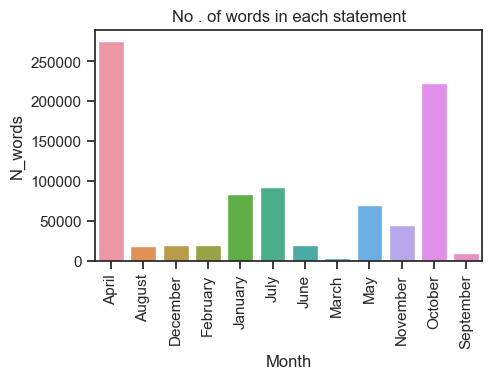

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))

plt.title('No . of words in each statement')
plt.ylabel("No of words")
y=sp_1['N_words'].groupby(sp_1.Month).sum()
plt.xticks(rotation=90)


sns.barplot(y.index,y)



In [40]:
#average number of words per each statement by each governor.
plt.figure(figsize=(15,15))
pd.crosstab(sp.Month,sp.index, values=sp.N_words, aggfunc='mean').round().fillna(0)
#pd.crosstab(sp.Month,[sp.year, sp.index],values='N_words',aggfunc='mean').round().fillna(0)

col_0,Dr. Bimal Jalan,Dr.Y.V.Reddy,Raghuram Rajan,Shatikanta Das,Subbarao,Urjit Patel
Month,,,,,,
April,14727.0,27588.0,3980.0,3140.0,19171.0,3286.0
August,0.0,0.0,2199.0,2828.0,0.0,3268.0
December,0.0,0.0,1856.0,2463.0,1539.0,3222.0
February,0.0,0.0,3368.0,2886.0,0.0,2368.0
January,0.0,15962.0,961.0,0.0,6802.0,0.0
July,0.0,15602.0,0.0,0.0,6112.0,0.0
June,0.0,0.0,3268.0,3084.0,5672.0,3328.0
March,0.0,0.0,1396.0,2175.0,1415.0,0.0
May,16336.0,23344.0,0.0,1974.0,14080.0,0.0


<Figure size 1500x1500 with 0 Axes>

It can be seen that the avergae number of words used was relatively higher in April and October, for all governors.

# Analysis of Sentences

In [41]:
sp.describe()

,year,N_words,N_sent
count,108.000000,108.000000,108.000000
mean,2011.685185,8448.138889,327.111111
std,5.790176,8324.402732,298.513430
min,1998.000000,609.000000,20.000000
25%,2008.000000,2268.000000,94.750000
50%,2012.000000,4089.000000,177.500000
75%,2016.000000,13990.000000,560.250000
max,2021.000000,41579.000000,1462.000000


In [42]:
sp['N_sent'].groupby(sp.index).mean()

governor
Dr. Bimal Jalan    512.444444
Dr.Y.V.Reddy       732.000000
Raghuram Rajan     111.809524
Shatikanta Das     115.076923
Subbarao           342.187500
Urjit Patel        143.857143
Name: N_sent, dtype: float64

C:\Users\bhara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

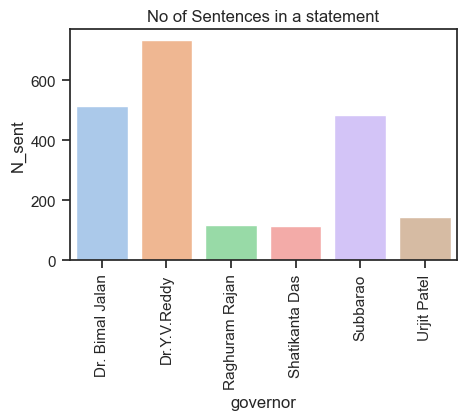

In [43]:
import seaborn as sns
plt.subplots_adjust(bottom=.25, left=.25)
plt.figure(figsize=(5,3))
plt.title("No of Sentences in a statement")

plt.xticks(rotation=90)
plt.ylabel('')
y=sp_1['N_sent'].groupby(sp_1.index).mean()

sns.barplot(y.index,y)
plt.show()

# Farr-Jenkins-Paterson Score 

The package for FJP scores was avaialble in R. So the scores was calculated and imported into python.

This score is given by 

FJP reading ease = -31.517 + 1.599(no: one syllable words/100 words) - 1.015(total words/total sentences)

In [44]:
len(sp.index)

108

In [45]:
score=pd.read_excel(r'D:\Bharani\MSE\Dissertation\News Sentiment analysis\FJP_score_Final.xlsx')
s_1=score.copy()

score


,document,Farr.Jenkins.Paterson
0,text1,-56.062259
1,text2,-58.883668
2,text3,-58.137830
3,text4,-57.092199
4,text5,-56.789522
...,...,...
99,text100,-52.359939
100,text101,-50.901117
101,text102,-48.396554
102,text103,-52.435633


In [46]:
sp[sp.year<2005]

,comments,Date,nth meeting,year,Statement,Month,tokens,sent_tokens,N_words,N_sent
governor,,,,,,,,,,
Dr. Bimal Jalan,....,1998-04-29,....,1998,Monetary Policy to support growth in 1998-99.\...,April,"[Monetary, Policy, to, support, growth, in, 19...",[Monetary Policy to support growth in 1998-99....,3464,109
Dr. Bimal Jalan,....,1998-10-30,....,1998,Introduction\n\n It will be recalled tha...,October,"[Introduction, It, will, be, recalled, that, i...",[Introduction\n\n It will be recalled th...,7989,289
Dr. Bimal Jalan,....,1999-04-20,....,1999,Domestic Developments\n\n2. According to th...,April,"[Domestic, Developments, 2, ., According, to, ...","[Domestic Developments\n\n2., According to the...",11434,447
Dr. Bimal Jalan,....,1999-10-29,Mid-Term,1999,Domestic developments\n\n2. According to the l...,October,"[Domestic, developments, 2, ., According, to, ...","[Domestic developments\n\n2., According to the...",10804,395
Dr. Bimal Jalan,....,2000-05-03,Annual,2000,Domestic Developments\n\n2. According to the e...,May,"[Domestic, Developments, 2, ., According, to, ...","[Domestic Developments\n\n2., According to the...",16336,623
Dr. Bimal Jalan,....,2000-11-04,Mid-Term,2000,Domestic Developments\n\n2. On the basis of th...,November,"[Domestic, Developments, 2, ., On, the, basis,...","[Domestic Developments\n\n2., On the basis of ...",16259,564
Dr. Bimal Jalan,....,2001-04-19,Annual,2001,Domestic Developments\n\n4. According to the l...,April,"[Domestic, Developments, 4, ., According, to, ...","[Domestic Developments\n\n4., According to the...",22131,790
Dr. Bimal Jalan,Monetary and Credit Policy for the year 2001-2002,2001-10-22,Mid-Term,2001,Domestic Developments\n\n2. The annual Stateme...,October,"[Domestic, Developments, 2, ., The, annual, St...","[Domestic Developments\n\n2., The annual State...",15548,554
Dr. Bimal Jalan,....,2002-04-29,Annual,2002,I. Review of Macroeconomic and Monetary\nDevel...,April,"[I, ., Review, of, Macroeconomic, and, Monetar...","[I., Review of Macroeconomic and Monetary\nDev...",21878,841


In [47]:
s_1.index=sp.iloc[4:,:].index

In [48]:

s_1.index=sp.iloc[4:,:].index
sp_2=pd.concat([sp.iloc[4:,:],s_1],axis=1)
d_1=sp_2[['Month','N_sent','Farr.Jenkins.Paterson']]
#d_1.reset_index(inplace=True)
#d_1.set_index('Month',append=True,inplace=True)
#d_1=d_1.swaplevel(0,1)
sp_2=sp_2.iloc[10:,:]
sp_2

,comments,Date,nth meeting,year,Statement,Month,tokens,sent_tokens,N_words,N_sent,document,Farr.Jenkins.Paterson
governor,,,,,,,,,,,,
Dr.Y.V.Reddy,....,2005-04-28,Annual,2005,The policy Statements of the Reserve Bank prov...,April,"[The, policy, Statements, of, the, Reserve, Ba...",[The policy Statements of the Reserve Bank pro...,17993,700,text11,-55.080929
Dr.Y.V.Reddy,....,2005-07-26,1st,2005,I. Assessment of Macroeconomic and Monetary De...,July,"[I, ., Assessment, of, Macroeconomic, and, Mon...","[I., Assessment of Macroeconomic and Monetary ...",16502,628,text12,-55.739612
Dr.Y.V.Reddy,....,2005-10-25,2nd,2005,I. Assessment of Macroeconomic and Monetary De...,October,"[I, ., Assessment, of, Macroeconomic, and, Mon...","[I., Assessment of Macroeconomic and Monetary ...",16502,628,text13,-55.739612
Dr.Y.V.Reddy,....,2006-01-24,3rd,2006,"Statement by Dr. Y. Venugopal Reddy, Governor,...",January,"[Statement, by, Dr., Y., Venugopal, Reddy, ,, ...","[Statement by Dr. Y. Venugopal Reddy, Governor...",11615,403,text14,-57.842695
Dr.Y.V.Reddy,....,2006-04-18,Annual,2006,Annual Policy Statement for the Year 2006-07 b...,April,"[Annual, Policy, Statement, for, the, Year, 20...",[Annual Policy Statement for the Year 2006-07 ...,28122,1085,text15,-56.057284
...,...,...,...,...,...,...,...,...,...,...,...,...
Shatikanta Das,....,2020-05-22,1st,2020,On the basis of an assessment of the current a...,May,"[On, the, basis, of, an, assessment, of, the, ...",[On the basis of an assessment of the current ...,1974,77,text100,-52.359939
Shatikanta Das,....,2020-08-06,2nd,2020,On the basis of an assessment of the current a...,August,"[On, the, basis, of, an, assessment, of, the, ...",[On the basis of an assessment of the current ...,2918,125,text101,-50.901117
Shatikanta Das,....,2020-10-09,3rd,2020,On the basis of an assessment of the current a...,October,"[On, the, basis, of, an, assessment, of, the, ...",[On the basis of an assessment of the current ...,1221,50,text102,-48.396554


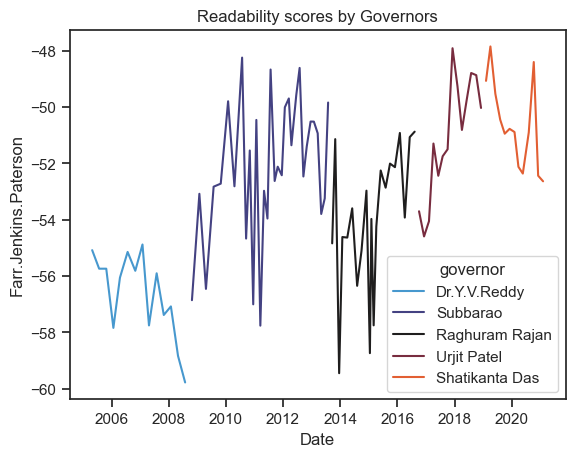

In [51]:
#Farr jenkinss cores across different statements
#plt.figure(figsize=(5,3))
plt.title('Readability scores by Governors')
sns.lineplot(x=sp_2.Date, y=sp_2['Farr.Jenkins.Paterson'],
             hue=sp_2.index,palette='icefire',
             data=sp_2);

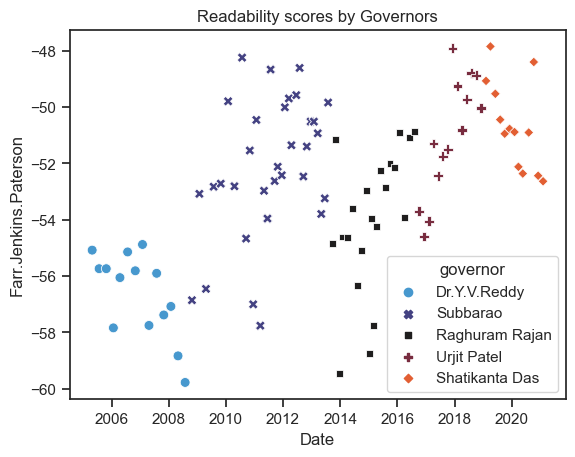

In [52]:
#Farr jenkinss cores across different statements
#plt.figure(figsize=(5,3))
plt.title('Readability scores by Governors')
sns.scatterplot(x=sp_2.Date, y=sp_2['Farr.Jenkins.Paterson'],
             hue=sp_2.index,palette='icefire',s=50,style='governor',
             data=sp_2);

Text(0.5, 0, 'Average FJP Score')

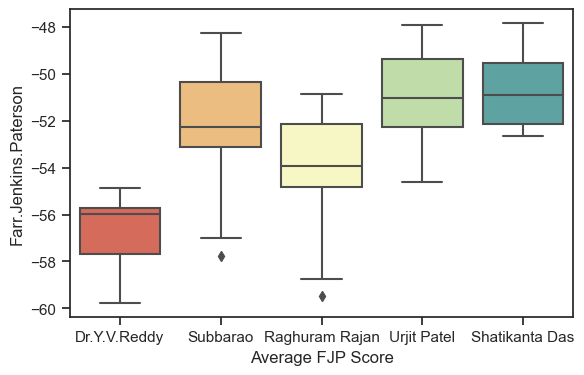

In [53]:
#average score across different goverenors
plt.figure(figsize=(6.5,4))
#x_1=d_1['Farr.Jenkins.Paterson'].groupby(d_1.index).mean()
#y=sp_2['Farr.Jenkins.Paterson'].groupby(sp_2.index).mean()
sns.boxplot(x=sp_2.index,y=sp_2['Farr.Jenkins.Paterson'],palette='Spectral',
             data=sp_2);
plt.xlabel('Average FJP Score')

In [54]:
?sns.barplot

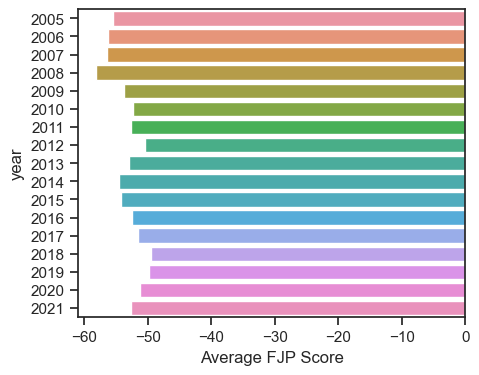

In [55]:
plt.figure(figsize=(5,4))
#x_1=d_1['Farr.Jenkins.Paterson'].groupby(d_1.index).mean()
y=sp_2['Farr.Jenkins.Paterson'].groupby(sp_2.year).mean()
sns.barplot(x=y, y=y.index,orient='h',hue_order=sp_2.index.unique(),
             data=sp_2)
#plt.axhline(sp_2.index.unique())
plt.xlabel('Average FJP Score');

In [56]:
score.describe()

,Farr.Jenkins.Paterson
count,104.000000
mean,-53.286449
std,3.075445
min,-59.781806
25%,-55.836642
50%,-52.818978
75%,-50.896841
max,-47.843379


In [57]:
sp_2['Farr.Jenkins.Paterson'].groupby(sp_2.index).describe()

,count,mean,std,min,25%,50%,75%,max
governor,,,,,,,,
Dr.Y.V.Reddy,14.0,-56.645815,1.495847,-59.781806,-57.662701,-55.980541,-55.739612,-54.879674
Raghuram Rajan,21.0,-53.972462,2.487047,-59.453025,-54.839686,-53.923474,-52.132296,-50.871336
Shatikanta Das,13.0,-50.640366,1.560009,-52.634931,-52.120121,-50.884014,-49.525016,-47.843379
Subbarao,32.0,-52.152679,2.488639,-57.763400,-53.119320,-52.268111,-50.342110,-48.239485
Urjit Patel,14.0,-51.049436,2.096438,-54.593291,-52.265096,-51.051264,-49.370990,-47.906739


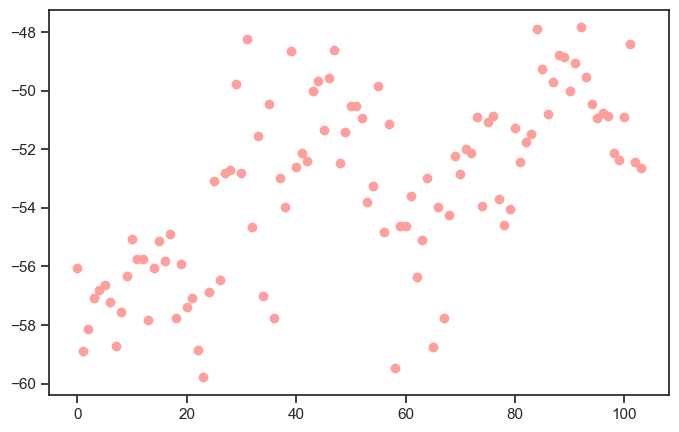

In [61]:
plt.figure(figsize=(8,5))
plt.plot(score['Farr.Jenkins.Paterson'],'ro')

It can be seen that the points are evenly placed, with less distance, implying that the difference in readilibility scores between some statements wouldnt be much different. Hence for convenience, it is preferable to cluster the statements.Hierarchial clustering was used for this purpose.

In [62]:
#score=score.loc[:59]
scores=pd.DataFrame(score['Farr.Jenkins.Paterson'])
scores=scores
scores.shape
scores.describe()

,Farr.Jenkins.Paterson
count,104.000000
mean,-53.286449
std,3.075445
min,-59.781806
25%,-55.836642
50%,-52.818978
75%,-50.896841
max,-47.843379


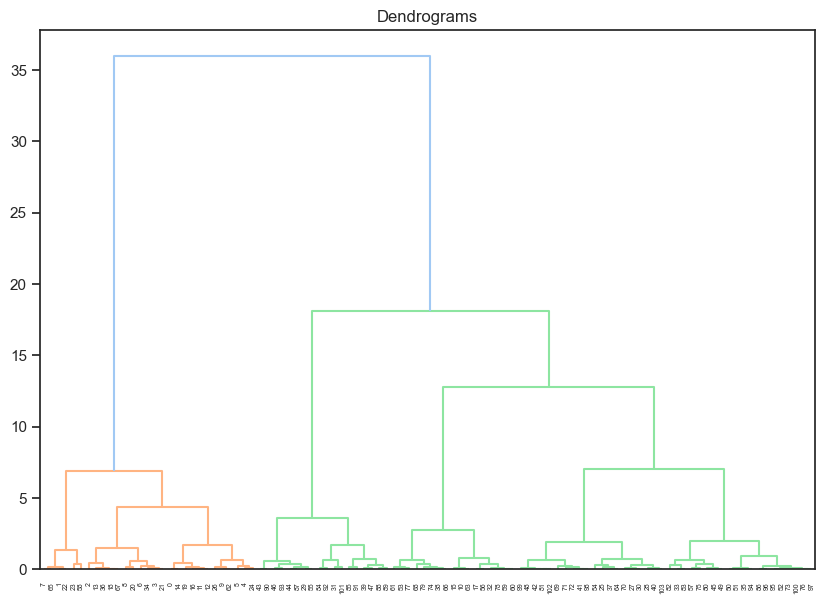

In [63]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
plt.axis(True)
dend = shc.dendrogram(shc.linkage(abs(scores), method='ward'))

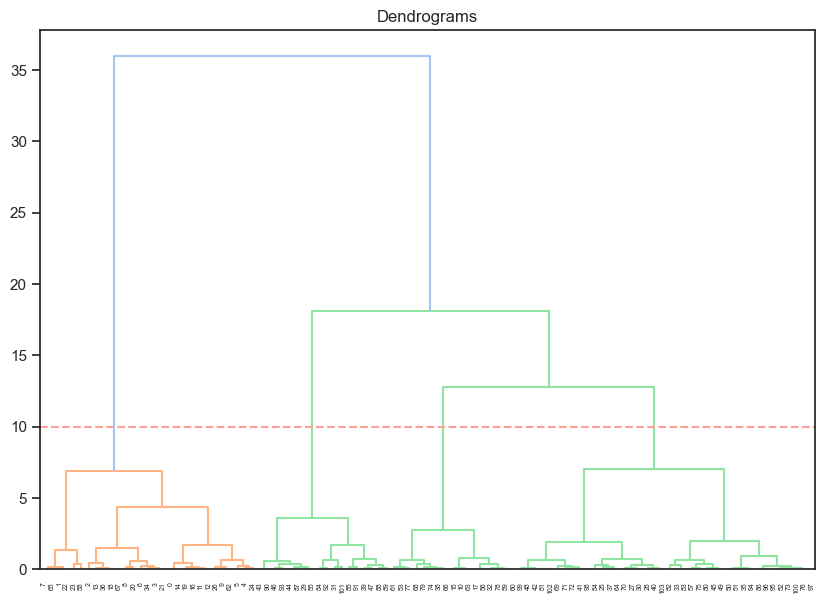

In [64]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(abs(scores), method='ward'))
plt.axhline(y=10, color='r', linestyle='--')

The threshold is arbitrarily chosen. 4clusters- ranging from  highly incomprehensive to very comprehendable, would be the scoring range 

lower value(-58) of the statement implies low readibility while higher value(-48) implies higher readility


In [65]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
predict=cluster.fit_predict(abs(scores))
Dict = {0:'Moderate Difficulty',1: 'Very high difficulty', 2: 'low',3: 'Very high difficulty'} 
predict=pd.Series(predict).map(Dict)
predict


0      Very high difficulty
1      Very high difficulty
2      Very high difficulty
3      Very high difficulty
4      Very high difficulty
               ...         
99      Moderate Difficulty
100     Moderate Difficulty
101                     low
102     Moderate Difficulty
103     Moderate Difficulty
Length: 104, dtype: object

In [66]:
predict.unique()

array(['Very high difficulty', 'Moderate Difficulty', 'low'], dtype=object)

In [67]:
np.unique(predict,return_counts=True)

(array(['Moderate Difficulty', 'Very high difficulty', 'low'], dtype=object),
 array([40, 46, 18], dtype=int64))

<Figure size 1000x1000 with 0 Axes>

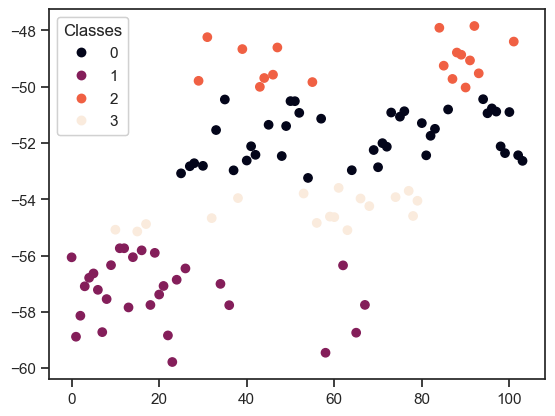

In [69]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
 
scatter=ax.scatter(scores.index,scores['Farr.Jenkins.Paterson'], c=cluster.labels_) 
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes");
ax.add_artist(legend1);
plt.show();

In [70]:
pd.Series(predict).value_counts()


Very high difficulty    46
Moderate Difficulty     40
low                     18
dtype: int64

C:\Users\bhara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

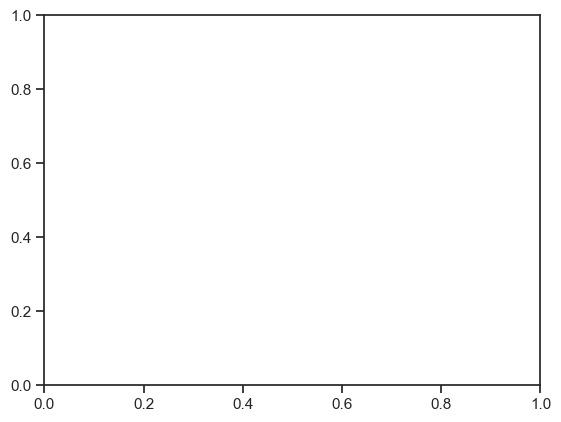

In [71]:
Dict = {0:'Moderate Difficulty',1: 'Very high difficulty', 2: 'low',3: 'Very high difficulty'} 
predict=pd.Series(predict).map(Dict)
sns.scatterplot(predict)

sp_2['cluster']=pd.array(predict)
sp_2=sp_2[sp_2['nth meeting'] != 'unannounced']


In [78]:
sp_2.shape


(94, 12)

In [79]:
sp_2.tail(50)

,comments,Date,nth meeting,year,Statement,Month,tokens,sent_tokens,N_words,N_sent,document,Farr.Jenkins.Paterson
governor,,,,,,,,,,,,
Subbarao,"had a lot of tables, which slowly shifted to c...",2013-06-17,mid,2013,\nSince early May when the Reserve Bank issued...,June,"[Since, early, May, when, the, Reserve, Bank, ...",[\nSince early May when the Reserve Bank issue...,13898,564,text55,-53.241456
Subbarao,....,2013-07-30,1st,2013,First Quarter Review of Monetary Policy 2013-1...,July,"[First, Quarter, Review, of, Monetary, Policy,...",[First Quarter Review of Monetary Policy 2013-...,4075,196,text56,-49.836041
Raghuram Rajan,....,2013-09-20,mid,2013,Mid-Quarter Monetary Policy Review: September ...,September,"[Mid-Quarter, Monetary, Policy, Review, :, Sep...",[Mid-Quarter Monetary Policy Review: September...,1156,44,text57,-54.839686
Raghuram Rajan,....,2013-10-29,2nd,2013,Second Quarter Review of Monetary Policy 2013-...,October,"[Second, Quarter, Review, of, Monetary, Policy...",[Second Quarter Review of Monetary Policy 2013...,4103,173,text58,-51.136526
Raghuram Rajan,Mid quarter review,2013-12-18,mid,2013,Monetary and Liquidity Measures\n\nOn the basi...,December,"[Monetary, and, Liquidity, Measures, On, the, ...",[Monetary and Liquidity Measures\n\nOn the bas...,1162,37,text59,-59.453025
Raghuram Rajan,3rd quarter review,2014-01-28,3rd,2014,On the basis of an assessment of the current a...,January,"[On, the, basis, of, an, assessment, of, the, ...",[On the basis of an assessment of the current ...,1313,49,text60,-54.614788
Raghuram Rajan,"First bimonthly review started; Also, one cons...",2014-04-01,1st,2014,"""Good morning and welcome to the Reserve Bank....",April,"[``, Good, morning, and, welcome, to, the, Res...","[""Good morning and welcome to the Reserve Bank...",1199,42,text61,-54.634188
Raghuram Rajan,smaller statement,2014-06-03,2nd,2014,Monetary and Liquidity Measures\n\nOn the basi...,June,"[Monetary, and, Liquidity, Measures, On, the, ...",[Monetary and Liquidity Measures\n\nOn the bas...,1709,68,text62,-53.595388
Raghuram Rajan,....,2014-08-05,3rd,2014,"By\nDr. Raghuram G Rajan, Governor\n\nMonetary...",August,"[By, Dr., Raghuram, G, Rajan, ,, Governor, Mon...","[By\nDr. Raghuram G Rajan, Governor\n\nMonetar...",1669,59,text63,-56.348051


In [80]:
sp_2.iloc[33]['sent_tokens'][45:47]

['Given the renewed strains in global financial markets, six major central banks announced coordinated actions in November 2011 to enhance their capacity to provide liquidity support to the global financial system.',
 'The European Central Bank (ECB) also announced longer-term refinancing operations (LTROs) with a maturity of 36 months.']

In [81]:
sp_2.iloc[66]

comments                                                              ....
Date                                                   2016-08-09 00:00:00
nth meeting                                                            3rd
year                                                                  2016
Statement                By\nDr. Raghuram G. Rajan, Governor\n\nMonetar...
Month                                                               August
tokens                   [By, Dr., Raghuram, G., Rajan, ,, Governor, Mo...
sent_tokens              [By\nDr. Raghuram G. Rajan, Governor\n\nMoneta...
N_words                                                               2463
N_sent                                                                 111
document                                                            text77
Farr.Jenkins.Paterson                                             -50.8713
Name: Raghuram Rajan, dtype: object

In [82]:
sp_2.head(50)

,comments,Date,nth meeting,year,Statement,Month,tokens,sent_tokens,N_words,N_sent,document,Farr.Jenkins.Paterson
governor,,,,,,,,,,,,
Dr.Y.V.Reddy,....,2005-04-28,Annual,2005,The policy Statements of the Reserve Bank prov...,April,"[The, policy, Statements, of, the, Reserve, Ba...",[The policy Statements of the Reserve Bank pro...,17993,700,text11,-55.080929
Dr.Y.V.Reddy,....,2005-07-26,1st,2005,I. Assessment of Macroeconomic and Monetary De...,July,"[I, ., Assessment, of, Macroeconomic, and, Mon...","[I., Assessment of Macroeconomic and Monetary ...",16502,628,text12,-55.739612
Dr.Y.V.Reddy,....,2005-10-25,2nd,2005,I. Assessment of Macroeconomic and Monetary De...,October,"[I, ., Assessment, of, Macroeconomic, and, Mon...","[I., Assessment of Macroeconomic and Monetary ...",16502,628,text13,-55.739612
Dr.Y.V.Reddy,....,2006-01-24,3rd,2006,"Statement by Dr. Y. Venugopal Reddy, Governor,...",January,"[Statement, by, Dr., Y., Venugopal, Reddy, ,, ...","[Statement by Dr. Y. Venugopal Reddy, Governor...",11615,403,text14,-57.842695
Dr.Y.V.Reddy,....,2006-04-18,Annual,2006,Annual Policy Statement for the Year 2006-07 b...,April,"[Annual, Policy, Statement, for, the, Year, 20...",[Annual Policy Statement for the Year 2006-07 ...,28122,1085,text15,-56.057284
Dr.Y.V.Reddy,....,2006-07-25,1st,2006,First Quarter Review of Annual Monetary Policy...,July,"[First, Quarter, Review, of, Annual, Monetary,...",[First Quarter Review of Annual Monetary Polic...,10548,401,text16,-55.144488
Dr.Y.V.Reddy,....,2006-10-31,2nd,2006,Mid-term Review of Annual Policy for the Year ...,October,"[Mid-term, Review, of, Annual, Policy, for, th...",[Mid-term Review of Annual Policy for the Year...,20433,798,text17,-55.814256
Dr.Y.V.Reddy,....,2007-01-31,3rd,2007,Third Quarter Review of Annual Monetary Policy...,January,"[Third, Quarter, Review, of, Annual, Monetary,...",[Third Quarter Review of Annual Monetary Polic...,16215,620,text18,-54.879674
Dr.Y.V.Reddy,....,2007-04-24,Annual,2007,Annual Policy Statement for the Year 2007-08 b...,April,"[Annual, Policy, Statement, for, the, Year, 20...",[Annual Policy Statement for the Year 2007-08 ...,31903,970,text19,-57.755486


updated=sp_2[['Date','year','nth meeting','Month', 'N_words', 'N_sent','Farr.Jenkins.Paterson', 'cluster']]
updated.to_csv('Updated_1.csv')


# Word Clouds

In [84]:
txt=sp['Statement'].groupby(sp.index).sum()
txt

governor
Dr. Bimal Jalan    Monetary Policy to support growth in 1998-99.\...
Dr.Y.V.Reddy       Domestic Developments\n\n2. The annual Stateme...
Raghuram Rajan     Mid-Quarter Monetary Policy Review: September ...
Shatikanta Das     On the basis of an assessment of the current a...
Subbarao           Mid-Term Review of Annual Policy for the Year ...
Urjit Patel        On the basis of an assessment of the current a...
Name: Statement, dtype: object

In [85]:
txt.shape
for i in range(len(txt)):
    senti=TextBlob(txt[i])
    print(txt.index[i],':',str(senti.sentiment))

Dr. Bimal Jalan : Sentiment(polarity=0.06975099523631845, subjectivity=0.361037542425571)
Dr.Y.V.Reddy : Sentiment(polarity=0.05907411693724073, subjectivity=0.3446059841463187)
Raghuram Rajan : Sentiment(polarity=0.03645468005069219, subjectivity=0.38236564757669134)
Shatikanta Das : Sentiment(polarity=0.0156816042523214, subjectivity=0.3539948083125373)
Subbarao : Sentiment(polarity=0.05457016349209141, subjectivity=0.34667266444433564)
Urjit Patel : Sentiment(polarity=0.027519763839417982, subjectivity=0.3646012145051398)


# Word Clouds for Bimal Jalan

Stopwords and punctations need to be removed from the statements before effective wordclouds are made.

In [86]:
import nltk
from nltk import FreqDist
import string  
text=txt[0].lower()
tokenized_word=word_tokenize(text)
stop_words=nltk.corpus.stopwords.words('english')
new_words=['committee','monetary','policy','in','would','guidelines','month','crore','activity','effect','condition','term','dr','basis','points','mpc','second','order','policy','MPC','mid-term','the','rate','however','reserve','rbi',' will','also','new','reserve bank',' january','february','march','april','may','june','july','august','september','october','novermber',' december','year','percent','per','cent']
[stop_words.append(i) for i in new_words]
print(stop_words)



filtered_word=[]

for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)
print("Tokenized Words:",tokenized_word[:100])
#print("Filterd Words:",filtered_word[:100])
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in filtered_word]
#print(stripped[:200])
filtered_words = [word for word in stripped if word.isalpha()]
print(filtered_words[:100])
#print(stop_words)



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

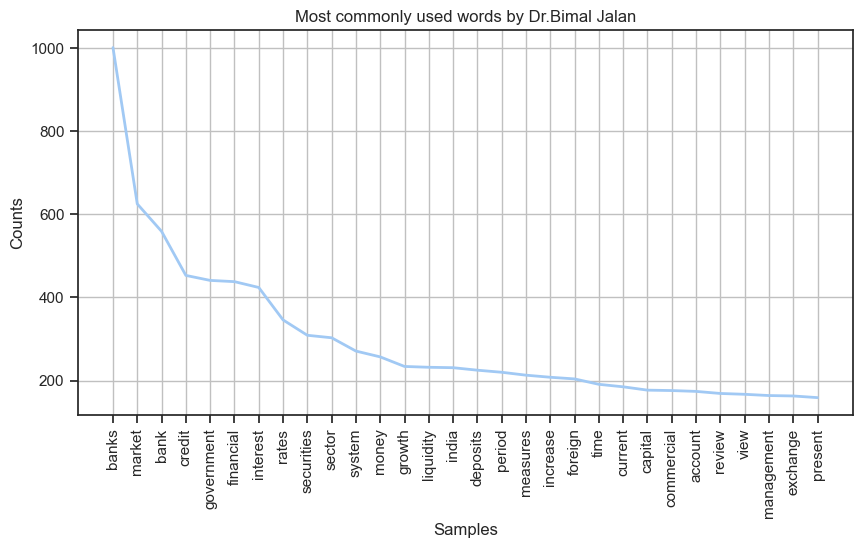

In [87]:
#line plot of most used words by Dr> Bimal Jalan
plt.figure(figsize=(10,5))
plt.xlabel("Words")
plt.ylabel("frequency")
fdist = FreqDist(filtered_words)
fdist.plot(30,cumulative=False,title="Most commonly used words by Dr.Bimal Jalan")
plt.show()

In [90]:
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))
    
print("Filtered Words:",filtered_words[:100])
print("Stemmed Words:",stemmed_words[:100])
lem = WordNetLemmatizer()

lemma_words=[]
for w in filtered_words:
    lemma_words.append(lem.lemmatize(w))
    
print("Filtered Words:",filtered_words[:100])
print("Lemmatize Words:",lemma_words[:100])
print('Total number of words after text pre-processing :', len(lemma_words))

Filtered Words: ['support', 'growth', 'sufficient', 'credit', 'available', 'industrial', 'revival', 'bank', 'reduced', 'percentage', 'point', 'concessions', 'exporters', 'number', 'reform', 'measures', 'introduced', 'give', 'greater', 'freedom', 'banks', 'reforms', 'financial', 'system', 'credit', 'flexible', 'annual', 'announcements', 'lay', 'stress', 'structural', 'measures', 'dr', 'bimal', 'jalan', 'governor', 'bank', 'india', 'today', 'unveiled', 'credit', 'first', 'half', 'statement', 'contained', 'many', 'structural', 'measures', 'response', 'important', 'changes', 'taking', 'place', 'regulatory', 'framework', 'financial', 'markets', 'shortterm', 'credit', 'measures', 'macroeconomic', 'developments', 'reviewing', 'economic', 'developments', 'governor', 'stated', 'broad', 'money', 'growth', 'significantly', 'higher', 'expansion', 'previous', 'explained', 'increase', 'account', 'substantial', 'expansion', 'domestic', 'credit', 'government', 'commercial', 'sectors', 'increase', 'net

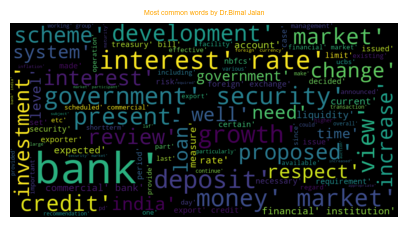

In [91]:
filtered_speech_words = str(lemma_words)

wordcloud = WordCloud(width=1000, height=500,max_words=100,random_state=21, max_font_size=110).generate(filtered_speech_words)
plt.figure(figsize=(5, 3))
plt.title("Most common words by Dr.Bimal Jalan",size=(5),color='orange')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

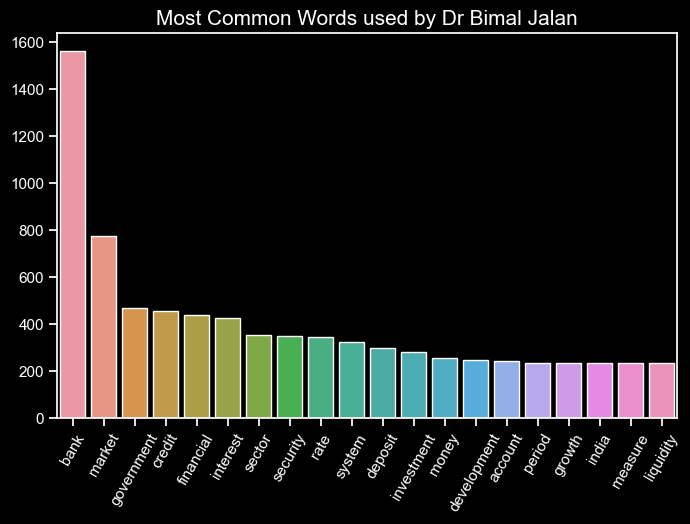

In [92]:
speech_word_counts = Counter(lemma_words)
# Plot top 20 most frequently occuring words
ds_common_words = [word[0] for word in speech_word_counts.most_common(20)]
ds_common_counts = [word[1] for word in speech_word_counts.most_common(20)]

# Using background style
plt.style.use('dark_background')
plt.figure(figsize=(8,5))
plt.xticks(rotation=60)

sns.barplot(x=ds_common_words, y=ds_common_counts)
plt.title('Most Common Words used by Dr Bimal Jalan',size=(15))
plt.show()


In [104]:
#most common bigrams for Bimal Jalan
def extract_ngrams(data, num):
    data=data.lower()
    n_grams = TextBlob(data).ngrams(num)
    clean = [gram for gram in n_grams if not any(stop in gram for stop in stop_words)]
    return [' '.join(grams) for grams in clean]
 
data = str(txt[0])
t_grams=extract_ngrams(data,2)
t_grams

speech_word_counts = Counter(t_grams)
# Plot top 20 most frequently occuring words
ds_common_words = [word[0] for word in speech_word_counts.most_common(20)]
ds_common_counts = [word[1] for word in speech_word_counts.most_common(20)]

# Using background style
plt.style.use('dark_background')
plt.figure(figsize=(8,5))
plt.xticks(rotation=60)

sns.barplot(x=ds_common_words, y=ds_common_counts)
plt.title('Most Common Words used by Dr Bimal Jalan',size=(15))
plt.show()


KeyError: 0

filtered_speech_words = str(lemma_words)

wordcloud = WordCloud(width=1600, height=800,max_words=100,random_state=21, max_font_size=110).generate(filtered_speech_words)
plt.figure(figsize=(10, 8))
plt.title("Most common words by Dr.Bimal Jalan",size=(5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# WordCloud for Other Governors

In [106]:
txt=pd.DataFrame(txt)
len(txt)

6

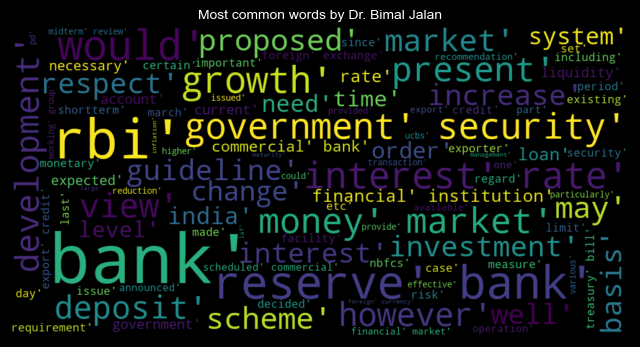

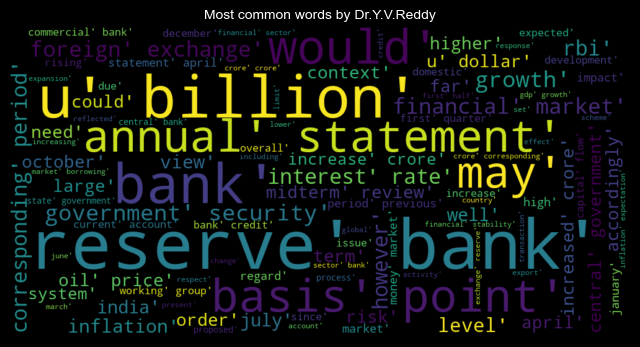

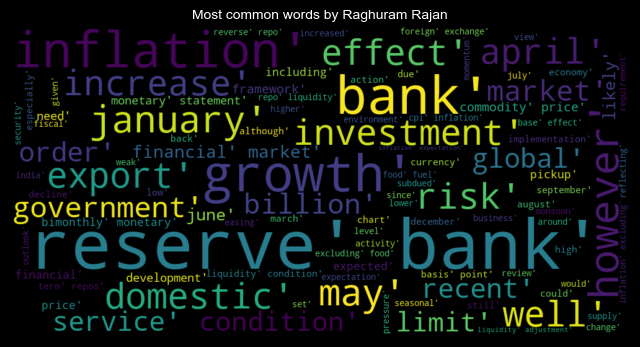

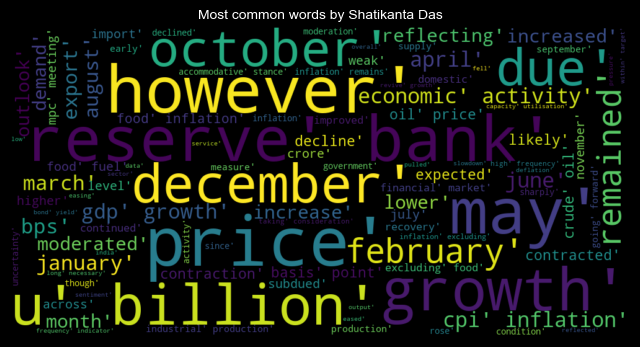

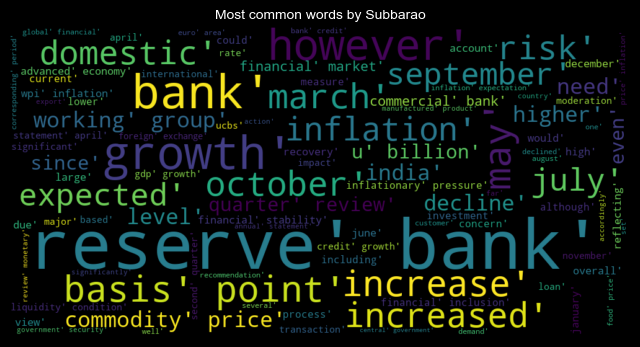

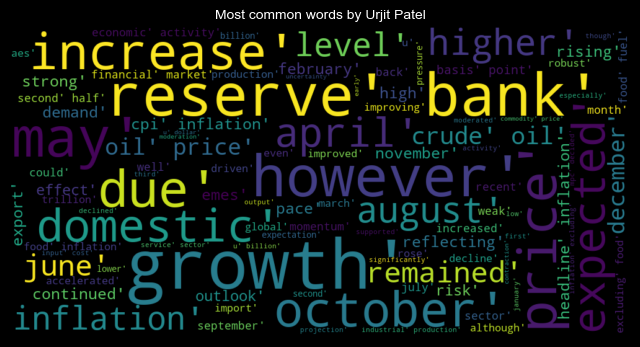

In [107]:
for i in range(len(txt)):
    text=txt['Statement'][i].lower()
    tokenized_word=word_tokenize(text)
    filtered_word=[]

    for w in tokenized_word:
        if w not in stop_words:
            filtered_word.append(w)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in filtered_word]
    #print(stripped[:200])
    filtered_words = [word for word in stripped if word.isalpha()]
    
    ps = PorterStemmer()

    stemmed_words=[]
    for w in filtered_words:
        stemmed_words.append(ps.stem(w))

    lem = WordNetLemmatizer()

    lemma_words=[]
    for w in filtered_words:
        lemma_words.append(lem.lemmatize(w))
        
    filtered_speech_words = str(lemma_words)

    wordcloud = WordCloud(width=1000, height=500,max_words=100,random_state=21, max_font_size=110).generate(filtered_speech_words)
    plt.figure(figsize=(8,8))
    plt.title("Most common words by {gov_name}".format(gov_name= txt.index[i]),size=(10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [ ]:
for i in range(len(txt)):
    text=txt['Statement'][i]
    text=text.lower()
    tokenized_word=word_tokenize(txt['Statement'][i])
    filtered_word=[]

    for w in tokenized_word:
        if w not in stop_words:
            filtered_word.append(w)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in filtered_word]
    #print(stripped[:200])
    filtered_words = [word for word in stripped if word.isalpha()]
    
    ps = PorterStemmer()

    stemmed_words=[]
    for w in filtered_words:
        stemmed_words.append(ps.stem(w))

    lem = WordNetLemmatizer()

    lemma_words=[]
    for w in filtered_words:
        lemma_words.append(lem.lemmatize(w))
        
    filtered_speech_words = str(lemma_words)


    speech_word_counts = Counter(lemma_words)
    # Plot top 20 most frequently occuring words from D Subbarao
    ds_common_words = [word[0] for word in speech_word_counts.most_common(20)]
    ds_common_counts = [word[1] for word in speech_word_counts.most_common(20)]

    # Using background style
    #plt.style.use('dark_background')
    plt.figure(figsize=(6,5))

    sns.barplot(x=ds_common_words, y=ds_common_counts)
    plt.title("Most common words by {gov_name}".format(gov_name= txt.index[i]),size=(15))
    plt.xticks(rotation=90)
    plt.show()

The Graphs show the gradual shifting of focus of monetary policies from banks, market, and Financial sector towards inflation, price(stability and inflation terms) and growth.
While Bimal Jalan's focus was primarily on banks and thier role in the economy, By Dr. SUbbarao's period, inflation and growth took the forefront. By Raghuram Rajan and Urjit patel's regimes, banks phased out of the picture and Inflation was the primary focus. 

What could be done furthur is to extract the frequent words used in association with our keywords(like banks) and the sentiment associated with it.

In [110]:
stop_words=nltk.corpus.stopwords.words('english')
new_words=['committee','monetary','policy','In','basis','excluding','group','quarter','going','points','mpc','second','order','policy','MPC','mid-term','the','rate','bank','however','rbi',' will','also','new','reserve bank',' january','february','march','april','may','june','july','august','september','october','novermber',' december','year','percent','per','cent']
# [stop_words.append(i) for i in new_words]
# stop_words

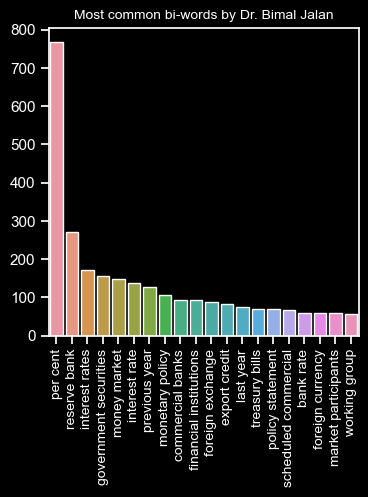

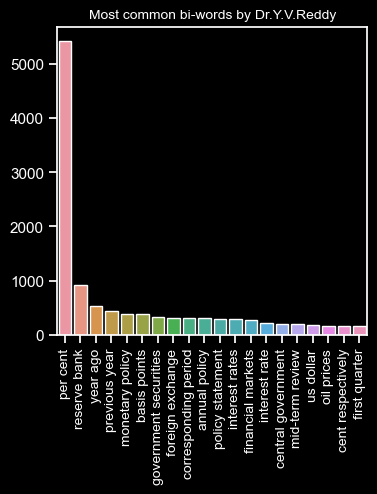

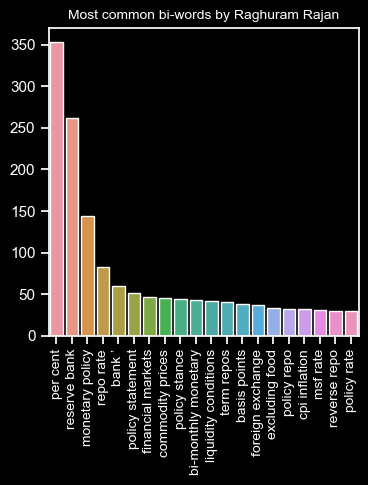

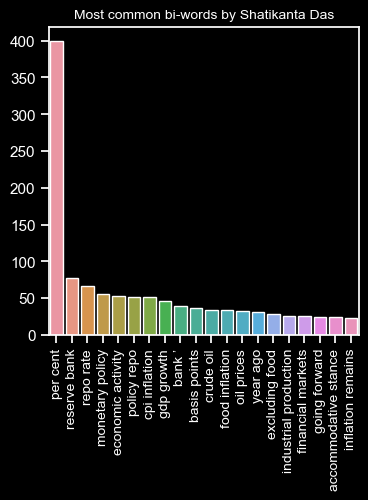

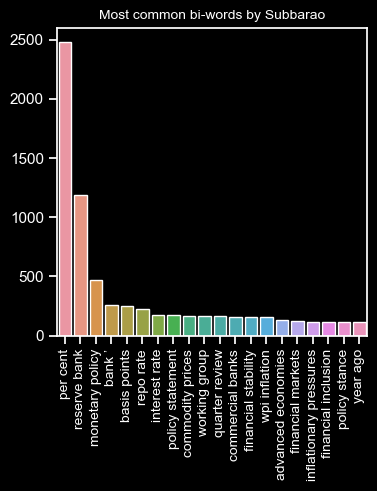

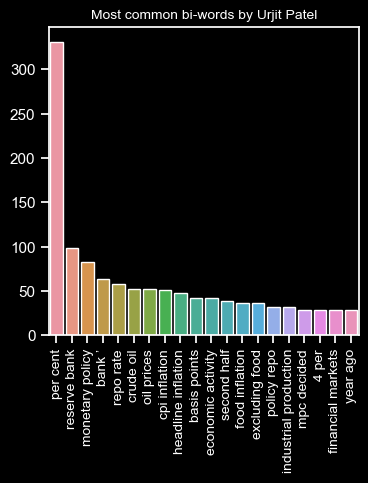

In [111]:
#most common bigrams
def extract_ngrams(data, num):
    data=data.lower()
    n_grams = TextBlob(data).ngrams(num)
    clean = [gram for gram in n_grams if not any(stop in gram for stop in stop_words)]
    return [' '.join(grams) for grams in clean]

for i in range(len(txt)):
    data = str(txt['Statement'][i])
    t_grams=extract_ngrams(data,2)
    t_grams

    speech_word_counts = Counter(t_grams)
    # Plot top 20 most frequently occuring words
    ds_common_words = [word[0] for word in speech_word_counts.most_common(20)]
    ds_common_counts = [word[1] for word in speech_word_counts.most_common(20)]

    # Using background style
    plt.style.use('dark_background')
    plt.figure(figsize=(4,4))
    plt.xticks(rotation=60,fontsize=10)
    
    sns.barplot(x=ds_common_words, y=ds_common_counts)
    plt.title("Most common bi-words by {gov_name}".format(gov_name= txt.index[i]),size=(10))
    plt.xticks(rotation=90)
    plt.show()

    

0


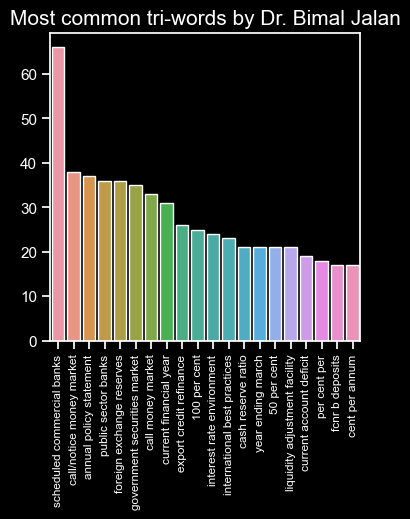

0


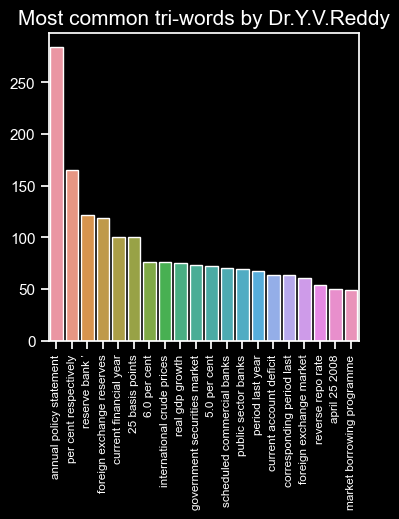

0


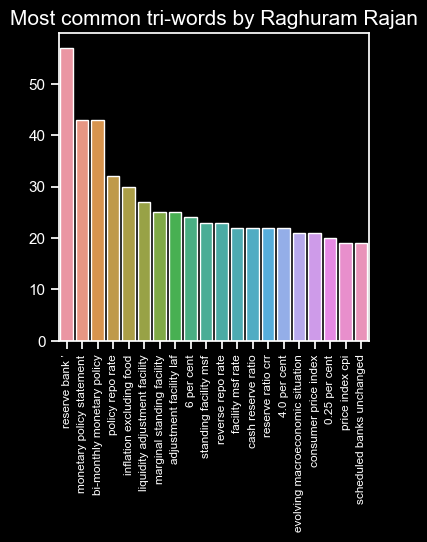

0


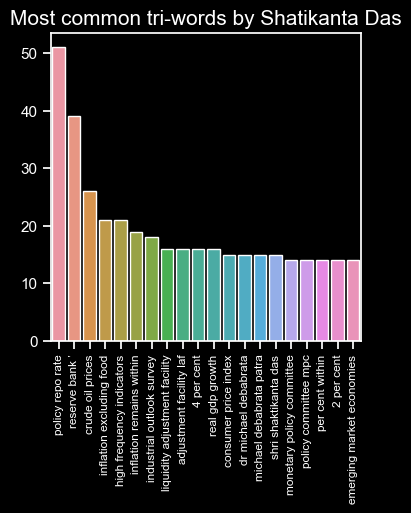

0


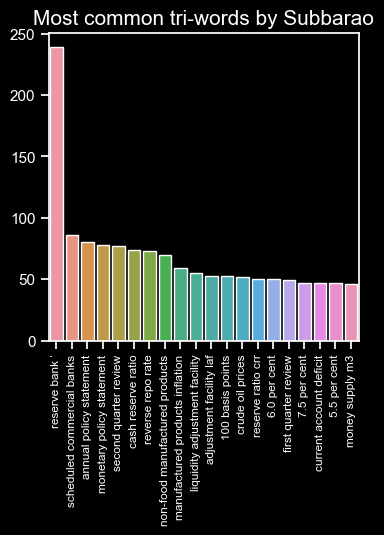

0


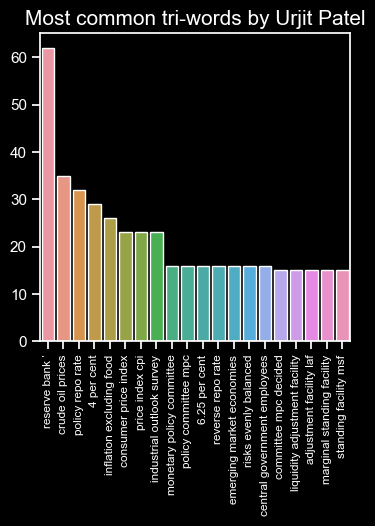

In [112]:
#commonly used trigrams
def extract_ngrams(data, num):
    data=data.lower()
    n_grams = TextBlob(data).ngrams(num)
    clean = [gram for gram in n_grams if not any(stop in gram for stop in stop_words)]
    return [' '.join(grams) for grams in clean]
for i in range(len(txt)):
    data = str(txt['Statement'][i])
    t_grams=extract_ngrams(data,3)
    t_grams

    speech_word_counts = Counter(t_grams)
    # Plot top 20 most frequently occuring words
    ds_common_words = [word[0] for word in speech_word_counts.most_common(20)]
    ds_common_counts = [word[1] for word in speech_word_counts.most_common(20)]
    print(speech_word_counts[10])

    # Using background style
    plt.style.use('dark_background')
    plt.figure(figsize=(4,4))
    plt.xticks(rotation=60,fontsize=8.5)
    
    sns.barplot(x=ds_common_words, y=ds_common_counts)
    plt.title("Most common tri-words by {gov_name}".format(gov_name= txt.index[i]),size=(15))
    plt.xticks(rotation=90)
    plt.show()

    

stop_words=nltk.corpus.stopwords.words('english')
new_words=['committee','Monetary','Policy','Committee','policy','rate','In','MPC','The','rate','Bank','Reserve','RBI',' will','also','new','Reserve Bank',' January','February','March','April','May','June','July','August','September','October','Novermber',' December','year','percent','per','cent']
[stop_words.append(i) for i in new_words]
print(stop_words)

def extract_ngrams(data, num):
    data=data.lower()
    n_grams = TextBlob(data).ngrams(num)
    clean = [gram for gram in n_grams if not any(stop in gram for stop in stop_words)]
    return [' '.join(grams) for grams in clean]

for i in range(len(txt)):
    data = str(txt['Statement'][i])
    t_grams=extract_ngrams(data,2)
    t_grams

    filtered_word=[]

    for w in t_grams:
        if w not in stop_words:
            filtered_word.append(w)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in filtered_word]
    #print(stripped[:200])
    filtered_words = [word for word in stripped if word.isalpha()]
    
    ps = PorterStemmer()

    stemmed_words=[]
    for w in filtered_words:
        stemmed_words.append(ps.stem(w))

    lem = WordNetLemmatizer()

    lemma_words=[]
    for w in filtered_words:
        lemma_words.append(lem.lemmatize(w))
        
    filtered_speech_words = str(lemma_words)

    wordcloud = WordCloud(width=1000, height=500,max_words=100,random_state=21, max_font_size=110).generate(filtered_speech_words)
    plt.figure(figsize=(5,5))
    plt.title("Most common words by {gov_name}".format(gov_name= txt.index[i]),size=(5),color='orange')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [ ]:
#In which context was the word banks most used?
import re
print(txt)
txt1=txt['Statement'][-1]
re.findall(r'([^.]*GDP growth[^.]*)',txt1)

In [ ]:
from readability import Readability
r = [Readability(row) for row in sp['Statement']]

In [ ]:
fks=[]
flesch=[]
ari=[]
coleman=[]
dale=[]
gunfog=[]
ease=[]
spache=[]
ari_age=[]
for row in sp['Statement']:
    r=Readability(row)
    
    fk=r.flesch_kincaid()
    fks.append(fk.grade_level)

    f = r.flesch()
    flesch.append(str(f.grade_levels))
    
    ease.append(f.ease)

    dc = r.dale_chall()
    dale.append(str(dc.grade_levels))

    a= r.ari()
    ari.append(str(a.grade_levels))

    cl = r.coleman_liau()
    coleman.append(cl.grade_level)

    gf = r.gunning_fog()
    gunfog.append(gf.grade_level)

    s = r.spache()
    spache.append(s.grade_level)
    
    ari_age.append(a.ages)
    
len(fks)

In [ ]:
flesch

In [ ]:
fks= [int(i) for i in fks]

In [ ]:
coleman= [int(i) for i in coleman]
spache= [int(i) for i in spache]

In [ ]:
score_list=[fks,flesch,ease,ari,coleman,dale,gunfog,spache]
score_df=pd.DataFrame()
for line in score_list:
    score_df=pd.concat([score_df,pd.Series(line)],axis=1)
score_df.columns=['fks','flesch','ease','ari','coleman',"dale",'gunfog','spache']
score_df.index=sp.index
score_df

In [ ]:
score_df.groupby(score_df.index).describe()

In [ ]:
type(score_df.fks[1])

In [ ]:
score_df.fks.groupby(score_df.index).mean()

In [ ]:
pd.crosstab(score_df.index,score_df.ease)

In [ ]:
pd.crosstab(score_df.index,score_df.gunfog)

In [ ]:
pd.crosstab(score_df.index,score_df.dale)

In [ ]:
score_df.spache.groupby(score_df.index).mean()

In [ ]:
r=Readability(txt['Statement'][1])
r.flesch_kincaid()
r.flesch()
r.gunning_fog()
r.coleman_liau()
r.dale_chall()
r.ari()
r.linsear_write()
r.smog()
r.spache()

fk = r.flesch_kincaid()
print(fk.score)
print(fk.grade_level)

f = r.flesch()
print(f.score)
print(f.ease)
print(f.grade_levels)

dc = r.dale_chall()
print(dc.score)
print(dc.grade_levels)

ari = r.ari()
print(ari.score)
print(ari.grade_levels)
print(ari.ages)

cl = r.coleman_liau()
print(cl.score)
print(cl.grade_level)

gf = r.gunning_fog()
print(gf.score)
print(gf.grade_level)

s = r.smog()
print(s.score)
print(s.grade_level)

s = r.smog(all_sentences=True)
print(s.score)
print(s.grade_level)

s = r.spache()
print(s.score)
print(s.grade_level)